In [229]:
# import libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score




# Ignore warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [230]:
trainingdataset = pd.read_csv('C:/Users/ganug/Flipkart_Reviews - Electronics.csv')
trainingdataset

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114
...,...,...,...,...,...,...,...,...,...
9369,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Good quality product,this head phnes give good base in pluged ears ...,Bhimavaram,"Apr, 2018",0,0
9370,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Awesome,This so far is one of the best headphones I've...,Ettimadai,"Apr, 2018",0,0
9371,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Really Nice,I am a BASS LOVER and all others like me read ...,Guntur District,"Apr, 2018",0,0
9372,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Super!,After use of one month........ It is an excell...,Kothamangalam,"Apr, 2018",0,0


In [231]:
togetspecificcolumns = trainingdataset.columns
dataset = trainingdataset[togetspecificcolumns.drop(['product_id','product_title','summary','location','date','upvotes','downvotes'])]
dataset

,rating,review
0,5,1-more flexible2-bass is very high3-sound clar...
1,5,Super sound and good looking I like that prize
2,5,Very much satisfied with the device at this pr...
3,5,"Nice headphone, bass was very good and sound i..."
4,5,Sound quality super battery backup super quali...
...,...,...
9369,4,this head phnes give good base in pluged ears ...
9370,5,This so far is one of the best headphones I've...
9371,4,I am a BASS LOVER and all others like me read ...
9372,5,After use of one month........ It is an excell...


In [232]:
dataset['rating'].nunique()

5

In [233]:
type=[]
for a in train['rating']:
    if a not in type:
        type.append(a)

In [234]:
l=1
for m in type:
    print([l],m)
    l+=1

[1] 5
[2] 4
[3] 1
[4] 3
[5] 2


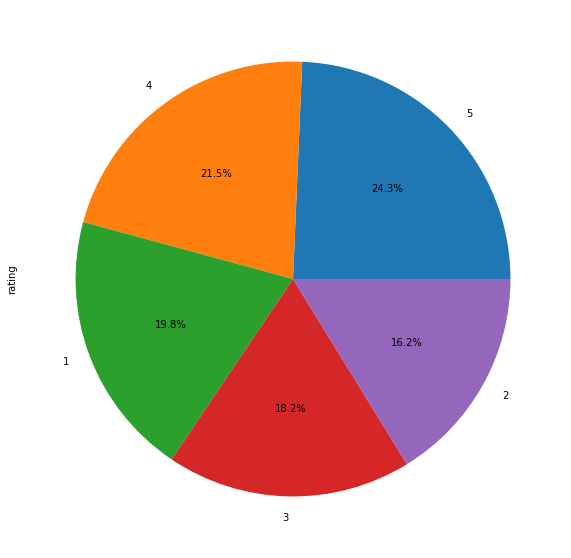

In [235]:
plt.figure(figsize=(20,10))
train['rating'].value_counts().apply(np.log).plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [236]:
A=train["rating"].values
Counter(A)

Counter({5: 5395, 4: 1959, 1: 1090, 3: 622, 2: 308})

In [237]:
StopWords = nltk.corpus.stopwords.words('english')

In [238]:
alist=""; counteachword = {}; characteristics=[]; listofthewords=[]
combinedsentence = str(train['review'])
nonalphanumeric=re.sub(r'[^w'+alist+']', ' ',combinedsentence)
for ch in range(ord('a'), ord('z')+1):
      characteristics.append(chr(ch))
for cha in range(ord('A'), ord('Z')+1):
      characteristics.append(chr(cha))
for G in type:
    for i in train.query('rating==@G')['review']:
        C=word_tokenize(str(i))
        for j in C:
            if j not in StopWords and j not in nonalphanumeric and j not in characteristics and len(j)>=3:
                if j[0] in nonalphanumeric and j[-1] in nonalphanumeric:
                    listofthewords.append(j[1:-1].lower())
                elif j[0] in nonalphanumeric and j[-1] not in nonalphanumeric:
                    listofthewords.append(j[1:].lower())
                elif j[-1] in nonalphanumeric and j[0] not in nonalphanumeric:
                    listofthewords.append(j[:-1].lower())
                else:
                    listofthewords.append(j.lower())
    counteachword[G]=Counter(listofthewords)

In [239]:
counteachword = pd.DataFrame(counteachword)
counteachword = counteachword.fillna(0)
counteachword

,5,4,1,3,2
flexiblebass,2.0,2.0,2.0,2.0,2
highsound,2.0,2.0,2.0,2.0,2
clarity,137.0,202.0,211.0,224.0,233
good,3195.0,4896.0,5089.0,5577.0,5685
battery,950.0,1302.0,1367.0,1464.0,1509
...,...,...,...,...,...
comfortablethe,0.0,0.0,0.0,0.0,1
horriblevoice,0.0,0.0,0.0,0.0,1
basscons,0.0,0.0,0.0,0.0,1
locationconclusionif,0.0,0.0,0.0,0.0,1


In [240]:
stop_words = set(stopwords.words('english'))
train=dataset

In [241]:
train

,rating,review
0,5,1-more flexible2-bass is very high3-sound clar...
1,5,Super sound and good looking I like that prize
2,5,Very much satisfied with the device at this pr...
3,5,"Nice headphone, bass was very good and sound i..."
4,5,Sound quality super battery backup super quali...
...,...,...
9369,4,this head phnes give good base in pluged ears ...
9370,5,This so far is one of the best headphones I've...
9371,4,I am a BASS LOVER and all others like me read ...
9372,5,After use of one month........ It is an excell...


In [242]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return " ".join(filtered_sentence)

In [243]:
def preprocess(line):
    line = line.lower()  #convert to lowercase
    line = re.sub(r'\d+', '', line)  #remove numbers
    line = line.translate(line.maketrans("","", string.punctuation))  #remove punctuation
#     line = line.translate(None, string.punctuation)  #remove punctuation
    line = re.sub(r'[^A-Za-z0-9 ]+', '', line)
    line = remove_stopwords(line)
    return line

In [244]:
for i,line in enumerate(train.review):
    train.review[i] = preprocess(line)

C:\Users\ganug\AppData\Local\Temp/ipykernel_10420/4259225570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.review[i] = preprocess(line)


In [245]:
count = Counter()
for sent in train["review"].to_numpy():
    for word in sent.split():
        count[word] += 1
        
count.most_common(10)

[('good', 5685),
 ('quality', 4048),
 ('sound', 3520),
 ('product', 3414),
 ('bass', 2754),
 ('nice', 1608),
 ('best', 1594),
 ('battery', 1509),
 ('price', 1490),
 ('awesome', 1184)]

In [246]:
rare_words = []
for word,freq in count.most_common():
    if(freq<=5):
        rare_words.append(word)
len(rare_words)

8262

In [247]:
rare_words[:20]

['wowwww',
 'clip',
 'activity',
 'self',
 'wast',
 'pm',
 'flagship',
 'ver',
 'serious',
 'youve',
 'workouts',
 'tis',
 'advise',
 'supporting',
 'buyed',
 'meant',
 'delayed',
 'isolation',
 'hve',
 'manage']

In [248]:
X = train.iloc[:, -1]
y = train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=0)

In [249]:
X_train

976     using portronics harmonics many research found...
7115                                                 good
6543    purchased blutooth earphone laptop mobile toge...
6876                                          value money
607                     nice bass nice sound nice collety
                              ...                        
7891               sound quality poorlike local headphone
9225    best thing earphone perfectly fits ear sound q...
4859    sound build pretty good touch control working ...
3264    great built quality recommended best buy trust...
2732    wounderful online class also good listening so...
Name: review, Length: 6561, dtype: object

In [287]:
y_train

976     4
7115    3
6543    4
6876    4
607     5
       ..
7891    3
9225    4
4859    3
3264    4
2732    5
Name: rating, Length: 6561, dtype: int64

In [250]:
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

In [251]:
print(tf_train)

  (0, 7454)	2
  (0, 5259)	1
  (0, 3158)	1
  (0, 4161)	1
  (0, 5967)	1
  (0, 2809)	1
  (0, 2945)	3
  (0, 7727)	1
  (0, 3220)	1
  (0, 5821)	1
  (0, 975)	1
  (0, 4772)	1
  (0, 2832)	1
  (0, 848)	1
  (0, 2935)	1
  (0, 1958)	1
  (0, 7551)	1
  (0, 1282)	1
  (0, 1000)	2
  (0, 5681)	1
  (0, 6667)	1
  (0, 412)	1
  (0, 2596)	1
  (0, 6165)	1
  (0, 662)	1
  :	:
  (6558, 996)	1
  (6558, 5324)	1
  (6558, 1589)	1
  (6558, 7187)	1
  (6559, 1000)	1
  (6559, 5634)	2
  (6559, 577)	1
  (6559, 6551)	1
  (6559, 736)	1
  (6559, 1036)	1
  (6559, 3062)	2
  (6559, 7222)	1
  (6559, 5867)	1
  (6559, 7252)	1
  (6559, 4507)	1
  (6559, 2086)	1
  (6560, 2945)	1
  (6560, 165)	1
  (6560, 7875)	1
  (6560, 1291)	1
  (6560, 6511)	1
  (6560, 4808)	1
  (6560, 3974)	1
  (6560, 7532)	1
  (6560, 7813)	1


In [252]:
print(tf_test)

  (0, 975)	1
  (0, 3150)	1
  (1, 2945)	1
  (1, 5428)	1
  (2, 1073)	1
  (2, 1531)	1
  (2, 2945)	1
  (3, 4878)	1
  (3, 5428)	1
  (3, 7505)	1
  (4, 478)	1
  (4, 657)	1
  (4, 736)	1
  (4, 836)	2
  (4, 1388)	1
  (4, 1441)	1
  (4, 1734)	1
  (4, 2945)	1
  (4, 3220)	2
  (4, 4012)	1
  (4, 4418)	1
  (4, 4657)	1
  (4, 5405)	1
  (4, 5634)	1
  (4, 6003)	1
  :	:
  (2812, 3988)	1
  (2812, 4240)	1
  (2812, 4377)	1
  (2812, 4477)	1
  (2812, 4772)	1
  (2812, 4908)	1
  (2812, 5042)	1
  (2812, 5428)	2
  (2812, 5634)	1
  (2812, 5804)	1
  (2812, 6118)	1
  (2812, 6481)	1
  (2812, 6551)	1
  (2812, 6623)	1
  (2812, 6893)	1
  (2812, 7023)	1
  (2812, 7025)	1
  (2812, 7120)	2
  (2812, 7192)	1
  (2812, 7290)	1
  (2812, 7403)	2
  (2812, 7436)	1
  (2812, 7724)	1
  (2812, 7732)	1
  (2812, 7755)	1


In [314]:
from sklearn.naive_bayes import MultinomialNB
model_1 = MultinomialNB(alpha=0.3)

In [315]:
model_1.fit(X=tf_train,y=y_train)

MultinomialNB(alpha=0.3)

In [316]:
expected_model_1 = y_test
predicted_model_1=model_1.predict(tf_test)

In [317]:
from sklearn import metrics
print('accuracy %s' % accuracy_score(expected_model_1, predicted_model_1))
print(metrics.classification_report(expected_model_1, predicted_model_1))
print(metrics.confusion_matrix(expected_model_1, predicted_model_1))
NaiveBayes_accuracy=accuracy_score(expected_model_1, predicted_model_1)

accuracy 0.6743690010664771
              precision    recall  f1-score   support

           1       0.71      0.76      0.73       336
           2       0.53      0.10      0.16       103
           3       0.38      0.08      0.13       184
           4       0.41      0.24      0.30       582
           5       0.72      0.92      0.81      1608

    accuracy                           0.67      2813
   macro avg       0.55      0.42      0.43      2813
weighted avg       0.62      0.67      0.63      2813

[[ 255    6    4   21   50]
 [  44   10    5   17   27]
 [  35    3   15   48   83]
 [  15    0    8  140  419]
 [  10    0    8  113 1477]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

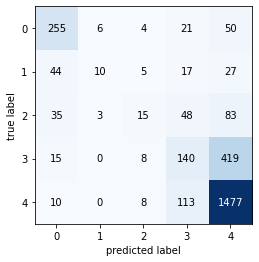

In [318]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(expected_model_1, predicted_model_1))

In [352]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(random_state=0)

In [353]:
model_2.fit(X=tf_train,y=y_train)

DecisionTreeClassifier(random_state=0)

In [354]:
expected_model_2 = y_test
predicted_model_2 =model_2.predict(tf_test)

In [355]:
from sklearn import metrics
print('accuracy %s' % accuracy_score(expected_model_2, predicted_model_2))
print(metrics.classification_report(expected_model_2, predicted_model_2))
print(metrics.confusion_matrix(expected_model_2, predicted_model_2))
DT_accuracy=accuracy_score(expected_model_2, predicted_model_2)

accuracy 0.6217561322431567
              precision    recall  f1-score   support

           1       0.65      0.70      0.68       336
           2       0.40      0.27      0.32       103
           3       0.25      0.17      0.20       184
           4       0.35      0.30      0.32       582
           5       0.73      0.80      0.76      1608

    accuracy                           0.62      2813
   macro avg       0.48      0.45      0.46      2813
weighted avg       0.60      0.62      0.61      2813

[[ 235   23   16   23   39]
 [  37   28    4   14   20]
 [  28    4   32   41   79]
 [  21    9   37  173  342]
 [  39    6   40  242 1281]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

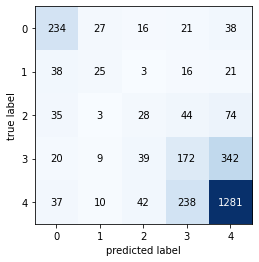

In [351]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(expected_model_2, predicted_model_2))

In [375]:
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier(n_neighbors=15, p=2,metric='euclidean')

In [376]:
model_3.fit(X=tf_train,y=y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [377]:
expected_model_3 = y_test
predicted_model_3=model_3.predict(tf_test)

In [378]:
from sklearn import metrics
print('accuracy %s' % accuracy_score(expected_model_3, predicted_model_3))
print(metrics.classification_report(expected_model_3, predicted_model_3))
print(metrics.confusion_matrix(expected_model_3, predicted_model_3))
KNN_accuracy=accuracy_score(expected_model_3, predicted_model_3)

accuracy 0.627444009953786
              precision    recall  f1-score   support

           1       0.65      0.48      0.55       336
           2       0.20      0.02      0.04       103
           3       0.15      0.01      0.02       184
           4       0.40      0.10      0.16       582
           5       0.64      0.96      0.77      1608

    accuracy                           0.63      2813
   macro avg       0.41      0.31      0.31      2813
weighted avg       0.55      0.63      0.54      2813

[[ 161    5    4   10  156]
 [  40    2    2    7   52]
 [  27    2    2   16  137]
 [   9    0    2   58  513]
 [   9    1    3   53 1542]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

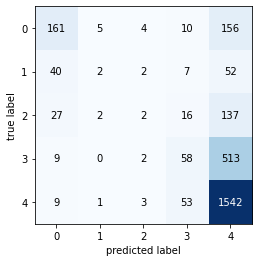

In [379]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(expected_model_3, predicted_model_3))

In [419]:
from sklearn import svm
model_4=svm.SVC(C=10)

In [420]:
model_4.fit(X=tf_train,y=y_train)

SVC(C=10)

In [421]:
expected_model_4 = y_test
predicted_model_4 =model_4.predict(tf_test)

In [422]:
from sklearn import metrics
print('accuracy %s' % accuracy_score(expected_model_4, predicted_model_4))
print(metrics.classification_report(expected_model_4, predicted_model_4))
print(metrics.confusion_matrix(expected_model_4, predicted_model_4))
SVM_accuracy=accuracy_score(expected_model_4, predicted_model_4)

accuracy 0.6772129399217917
              precision    recall  f1-score   support

           1       0.68      0.71      0.70       336
           2       0.50      0.17      0.25       103
           3       0.39      0.14      0.21       184
           4       0.50      0.22      0.31       582
           5       0.71      0.93      0.81      1608

    accuracy                           0.68      2813
   macro avg       0.56      0.43      0.45      2813
weighted avg       0.63      0.68      0.63      2813

[[ 239   15   11   10   61]
 [  52   17    2    8   24]
 [  30    1   26   25  102]
 [  16    1   14  130  421]
 [  14    0   13   88 1493]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

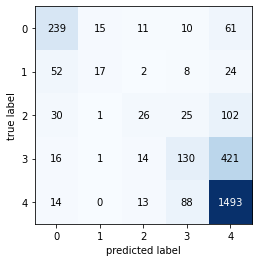

In [423]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(expected_model_4, predicted_model_4))

In [424]:
Accuracy_of_all_Algorithms = [NaiveBayes_accuracy,DT_accuracy,KNN_accuracy,SVM_accuracy]

In [425]:
Accuracy_of_all_Algorithms

[0.6743690010664771, 0.6217561322431567, 0.627444009953786, 0.6772129399217917]

In [426]:
A=[Accuracy_of_all_Algorithms]
new = pd.DataFrame(A, index = ['Accuracy'], columns = ['NaiveBayes','Decision Tree','KNN', 'SVM'])

In [427]:
new

,NaiveBayes,Decision Tree,KNN,SVM
Accuracy,0.674369,0.621756,0.627444,0.677213


In [428]:
Models_used=['Naive Bayes', 'Decision Tree', 'KNN', 'SVM']

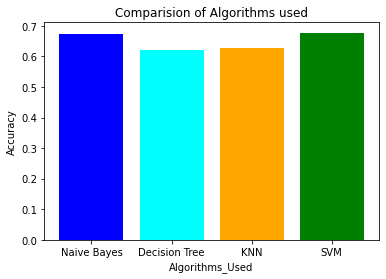

In [432]:
plt.bar(Models_used,Accuracy_of_all_Algorithms, color=['blue','cyan','orange','green'])
plt.xlabel('Algorithms_Used')
plt.ylabel('Accuracy')
plt.title('Comparision of Algorithms used')
plt.show()

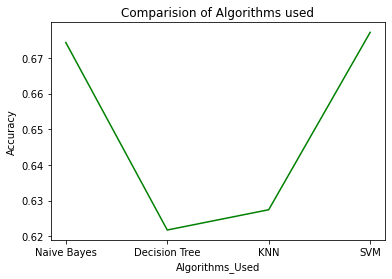

In [433]:
plt.plot(Models_used,Accuracy_of_all_Algorithms, color='green')
plt.xlabel('Algorithms_Used')
plt.ylabel('Accuracy')
plt.title('Comparision of Algorithms used')
plt.show()

# References

1) https://www.machinelearningplus.com/plots/bar-plot-in-python/
2) https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset
3) https://medium.com/@craxtarun/text-classification-using-naive-bayes-classifier-818885830f51
4) https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.06-Bar-Charts-and-Pie-Charts/ 
5) https://stackoverflow.com/questions/55360559/check-number-of-stopwords-in-a-text-column-pandas